# Plotting angular distributions for U-238

In [4]:
import sandy

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [8]:
tape = sandy.get_endf6_file("jeff_33", "xs", 922380)

In [9]:
lpc = sandy.Lpc.from_endf6(tape)  # legendre polynomial coefficients

Available MT numbers

In [10]:
lpc.data.index.get_level_values("MT").unique()

Index([ 2, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90],
      dtype='int64', name='MT')

Tabulated energies (linear interpolation is assumed)

In [11]:
lpc.data.index.get_level_values("E").unique()

Index([     1e-05,     1000.0,     2000.0,     5000.0,    10000.0,    20000.0,
          50000.0,   100000.0,   200000.0,   400000.0,   600000.0,   800000.0,
        1000000.0,  1400000.0,  1800000.0,  2200000.0,  2600000.0,  3000000.0,
        4000000.0,  5000000.0,  6000000.0,  7000000.0,  8000000.0, 10000000.0,
       12000000.0, 14000000.0, 16000000.0, 18000000.0, 20000000.0, 22000000.0,
       24000000.0, 26000000.0, 28000000.0, 30000000.0,    45100.3,   149039.0,
         308512.0,   520496.0,   682982.0,   735001.0,   778987.0,   830203.0,
         929622.0,   934744.0,   954226.0,   970394.0,   971399.0,   997207.0,
        1001730.0,  1041700.0,  1061080.0,  1063990.0,  1064790.0,  1081060.0,
        1110390.0,  1117310.0,  1131780.0,  1133480.0,  1140610.0,  1155170.0,
        1172950.0,  1255296.0,  9000000.0, 11000000.0, 13000000.0, 15000000.0,
       17000000.0, 19000000.0,  1446102.0,  1757415.0,  1958263.0,  2159110.0,
        2309746.0,  2500551.0,  2952457.0,  3202512.

## Plot for MT=2

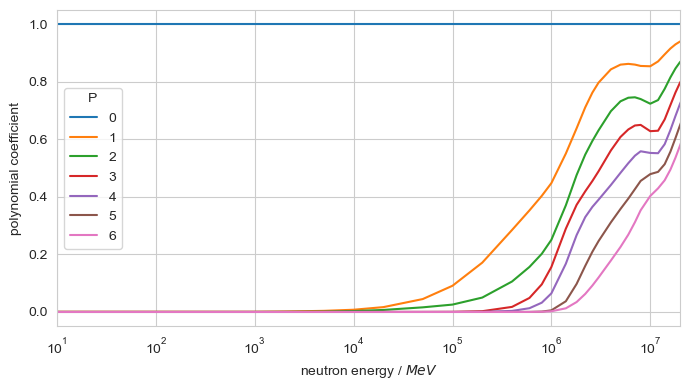

In [12]:
# keep only coefficients for first 6 polynomials
data = lpc.data.stack().rename("VAL").reset_index().query("MT==2 & P<=6")
data["P"] = data["P"].astype("category")

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
sns.lineplot(ax=ax, data=data, x="E", y="VAL", hue="P")
ax.set_xlim([1e1, 2e7])
ax.set_xlabel("neutron energy / $MeV$")
ax.set_ylabel("polynomial coefficient")
ax.set_xscale("log")
fig.tight_layout()

Convert polynomial coefficients to tabulated angular distribution

In [13]:
cosines = np.linspace(-1, 1, 101)
tpd = lpc.filter_by("MT", 2).to_tpd(cosines=cosines)

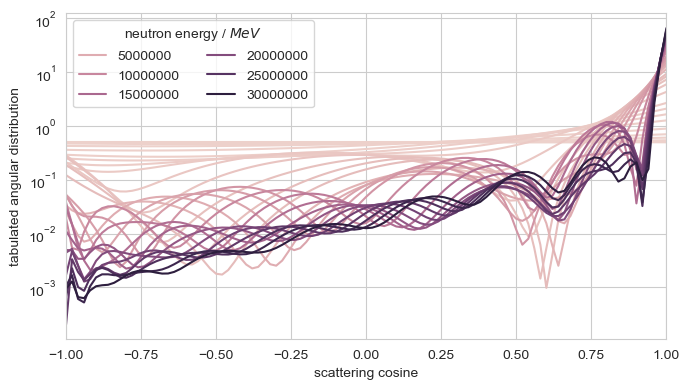

In [14]:
data = tpd.data.stack().rename("VAL").reset_index()

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
sns.lineplot(ax=ax, data=data, x="COSINE", y="VAL", hue="E")
ax.legend(title="neutron energy / $MeV$", ncol=2)
ax.set_xlim([-1, 1])
ax.set_xlabel("scattering cosine")
ax.set_ylabel("tabulated angular distribution")
ax.set_yscale("log")
fig.tight_layout()

## Plot for MT=51

In [15]:
cosines = np.linspace(-1, 1, 101)
tpd = lpc.filter_by("MT", 51).to_tpd(cosines=cosines)

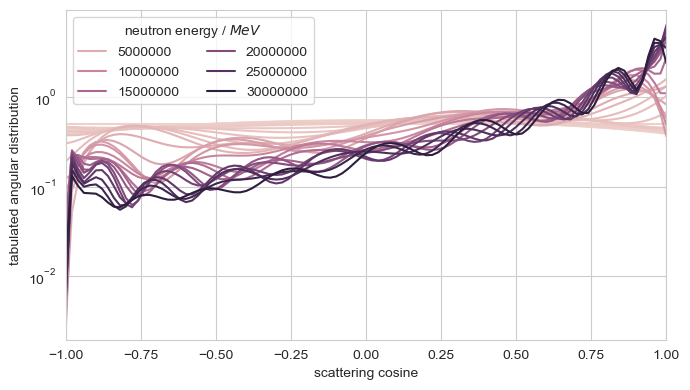

In [16]:
data = tpd.data.stack().rename("VAL").reset_index()

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
sns.lineplot(ax=ax, data=data, x="COSINE", y="VAL", hue="E")
ax.legend(title="neutron energy / $MeV$", ncol=2)
ax.set_xlim([-1, 1])
ax.set_xlabel("scattering cosine")
ax.set_ylabel("tabulated angular distribution")
ax.set_yscale("log")
fig.tight_layout()

## Plot for MT=90

In [17]:
cosines = np.linspace(-1, 1, 101)
tpd = lpc.filter_by("MT", 90).to_tpd(cosines=cosines)

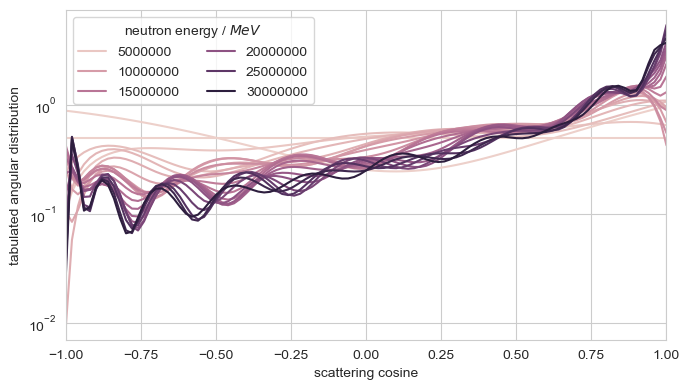

In [18]:
data = tpd.data.stack().rename("VAL").reset_index()

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
sns.lineplot(ax=ax, data=data, x="COSINE", y="VAL", hue="E")
ax.legend(title="neutron energy / $MeV$", ncol=2)
ax.set_xlim([-1, 1])
ax.set_xlabel("scattering cosine")
ax.set_ylabel("tabulated angular distribution")
ax.set_yscale("log")
fig.tight_layout()